<a href="https://www.kaggle.com/muhammadarkaanahnaf/notebook195b8e4249?scriptVersionId=85957155" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**IMPORTING DATA**

In [2]:
#Import train and test dataset
house_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
house_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sample_sub = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
#print first 5 rows of train data set
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Summary of train.csv
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Summary of test.csv
house_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
#print first 5 rows of test data set
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#Shape of the given dataset
house_train.shape, house_test.shape

((1460, 81), (1459, 80))

In [8]:
#Check for duplicated row in train.csv and test.csv
house_train.duplicated().values.any(),house_test.duplicated().values.any()

(False, False)

In [9]:
#Drop unecessary features
house_train.drop(['Id'], axis=1, inplace=True)
house_test.drop(['Id'], axis=1, inplace=True)

(1460, 80)


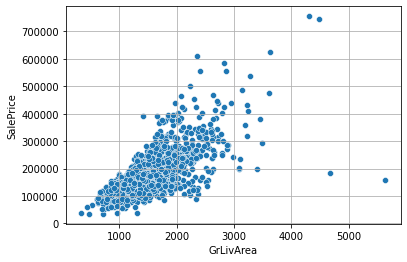

In [10]:
#checking outliers
import seaborn as sns
sns.scatterplot(data=house_train, x='GrLivArea', y='SalePrice')
plt.grid()
print(house_train.shape)

2 points removed from data
(1459, 80)


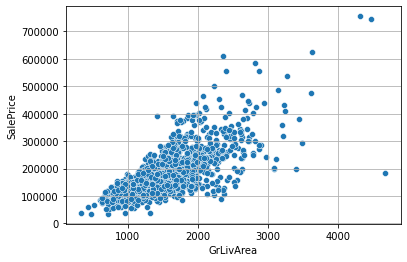

In [11]:
#removing outliers and check again
house_train = house_train.drop(house_train[house_train['GrLivArea']>5000].index)

sns.scatterplot(data=house_train, x='GrLivArea', y='SalePrice')
plt.grid()
print("2 points removed from data")
print(house_train.shape)

In [12]:
#Separate Categorical and Numerical Features (numerical_features) (Train)
train_numerical = house_train[house_train.dtypes[house_train.dtypes != "object"].index]
train_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
#Separate Categorical and Numerical Features (categorical_features) (Train)
train_categorical = house_train[house_train.dtypes[house_train.dtypes == "object"].index]
train_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
#Separate Categorical and Numerical Features (categorical_features) (Test)
test_categorical = house_test[house_test.dtypes[house_test.dtypes == "object"].index]
test_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [15]:
#Separate Categorical and Numerical Features (numerical_features) (Test)
test_numerical = house_test[house_test.dtypes[house_test.dtypes != "object"].index]
test_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [16]:
#Define Function to count every column with missing value
def get_missing_value(df):
    mis_val = df.isnull().sum()
    tot_val = df.shape[0]
    mis_percentage = round((100 * mis_val / tot_val),2)
    miss_tab = pd.concat([mis_val, mis_percentage], axis=1)
    miss_tab_col_name = miss_tab.rename(columns = {0 : 'Row With Missing Value', 1 : 'Percentage (%)'})
    miss_tab_col_name = miss_tab_col_name.sort_values('Percentage (%)',ascending=False)
    return miss_tab_col_name

In [17]:
#Columns that has missing values in train data
miss_train = get_missing_value(house_train)
miss_train

,Row With Missing Value,Percentage (%)
PoolQC,1453,99.59
MiscFeature,1405,96.30
Alley,1368,93.76
Fence,1178,80.74
FireplaceQu,690,47.29
...,...,...
Heating,0,0.00
HeatingQC,0,0.00
MSZoning,0,0.00
1stFlrSF,0,0.00


In [18]:
#missing values in numerical features (train)
miss_train_numerical = get_missing_value(train_numerical)
miss_train_numerical

,Row With Missing Value,Percentage (%)
LotFrontage,259,17.75
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
OpenPorchSF,0,0.00
KitchenAbvGr,0,0.00
TotRmsAbvGrd,0,0.00
Fireplaces,0,0.00
GarageCars,0,0.00
GarageArea,0,0.00
WoodDeckSF,0,0.00


In [19]:
#Replacing missing values in numerical features (train)
train_numerical['GarageYrBlt'].fillna(train_numerical['YearBuilt'],inplace=True)
train_numerical['MasVnrArea'].fillna(0,inplace=True)
train_numerical['LotFrontage'].fillna(train_numerical['LotFrontage'].mean(),inplace=True)
new_missing_value_train = train_numerical.isna().values.sum()
print("total missing values for numerical features in train.csv is ",new_missing_value_train)

total missing values for numerical features in train.csv is  0


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
#missing values in categorical features (train)
miss_train_categorical = get_missing_value(train_categorical)
miss_train_categorical

,Row With Missing Value,Percentage (%)
PoolQC,1453,99.59
MiscFeature,1405,96.30
Alley,1368,93.76
Fence,1178,80.74
FireplaceQu,690,47.29
GarageType,81,5.55
GarageCond,81,5.55
GarageQual,81,5.55
GarageFinish,81,5.55
BsmtFinType2,38,2.60


In [21]:
#Replacing missing values in categorical features (train)
train_categorical['PoolQC'].fillna('No',inplace=True)
train_categorical['Alley'].fillna('No',inplace=True)
train_categorical['MiscFeature'].fillna('No',inplace=True)
train_categorical['Fence'].fillna('No',inplace=True)
train_categorical['FireplaceQu'].fillna('No',inplace=True)
train_categorical['GarageType'].fillna('No',inplace=True)
train_categorical['GarageCond'].fillna('No',inplace=True)
train_categorical['GarageQual'].fillna('No',inplace=True)
train_categorical['GarageFinish'].fillna('No',inplace=True)
train_categorical['BsmtFinType2'].fillna('No',inplace=True)
train_categorical['BsmtExposure'].fillna('No',inplace=True)
train_categorical['BsmtFinType1'].fillna('No',inplace=True)
train_categorical['BsmtQual'].fillna('No',inplace=True)
train_categorical['BsmtCond'].fillna('No',inplace=True)
train_categorical['MasVnrType'].fillna('No',inplace=True)
train_categorical['Electrical'].fillna('FuseF',inplace=True)
new_missing_value_train_cat = train_categorical.isna().values.sum()
print("total missing values for categorical features in train.csv is ",new_missing_value_train_cat)

total missing values for categorical features in train.csv is  0


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
#Columns that has missing values in test data
miss_test = get_missing_value(house_test)
miss_test

,Row With Missing Value,Percentage (%)
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
...,...,...
Electrical,0,0.00
1stFlrSF,0,0.00
2ndFlrSF,0,0.00
LowQualFinSF,0,0.00


In [23]:
#Replacing missing values in numerical features (test)
test_numerical['LotFrontage'].fillna(house_test['LotFrontage'].mean(),inplace=True)
test_numerical['GarageYrBlt'].fillna(house_test['YearBuilt'],inplace=True)
test_numerical['MasVnrArea'].fillna(0,inplace=True)
test_numerical['BsmtHalfBath'].fillna(0,inplace=True)
test_numerical['BsmtFullBath'].fillna(0,inplace=True)
test_numerical['BsmtFinSF1'].fillna(0,inplace=True)
test_numerical['GarageCars'].fillna(0,inplace=True)
test_numerical['BsmtUnfSF'].fillna(0,inplace=True)
test_numerical['TotalBsmtSF'].fillna(0,inplace=True)
test_numerical['GarageArea'].fillna(0,inplace=True)
test_numerical['BsmtFinSF2'].fillna(0,inplace=True)
new_missing_value_test_num = test_numerical.isna().values.sum()
print("total missing values for numerical features in test.csv is ",new_missing_value_test_num)

total missing values for numerical features in test.csv is  0


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
#Replacing missing values in categorical features (test)
test_categorical['PoolQC'].fillna('No',inplace=True)
test_categorical['MiscFeature'].fillna('No',inplace=True)
test_categorical['Alley'].fillna('No',inplace=True)
test_categorical['Fence'].fillna('No',inplace=True)
test_categorical['FireplaceQu'].fillna('No',inplace=True)
test_categorical['GarageQual'].fillna('No',inplace=True)
test_categorical['GarageCond'].fillna('No',inplace=True)
test_categorical['GarageType'].fillna('No',inplace=True)
test_categorical['GarageFinish'].fillna('No',inplace=True)
test_categorical['BsmtCond'].fillna('No',inplace=True)
test_categorical['BsmtQual'].fillna('No',inplace=True)
test_categorical['BsmtExposure'].fillna('No',inplace=True)
test_categorical['BsmtFinType2'].fillna('No',inplace=True)
test_categorical['BsmtFinType1'].fillna('No',inplace=True)
test_categorical['MasVnrType'].fillna('No',inplace=True)
test_categorical['MSZoning'].fillna('No',inplace=True)
test_categorical['Functional'].fillna('No',inplace=True)
test_categorical['Utilities'].fillna('No',inplace=True)
test_categorical['KitchenQual'].fillna('No',inplace=True)
test_categorical['SaleType'].fillna('No',inplace=True)
test_categorical['Exterior1st'].fillna('No',inplace=True)
test_categorical['Exterior2nd'].fillna('No',inplace=True)
new_missing_value_test_cat = test_categorical.isna().values.sum()
print("total missing values for categorical features in test.csv is ",new_missing_value_test_cat)

total missing values for categorical features in test.csv is  0


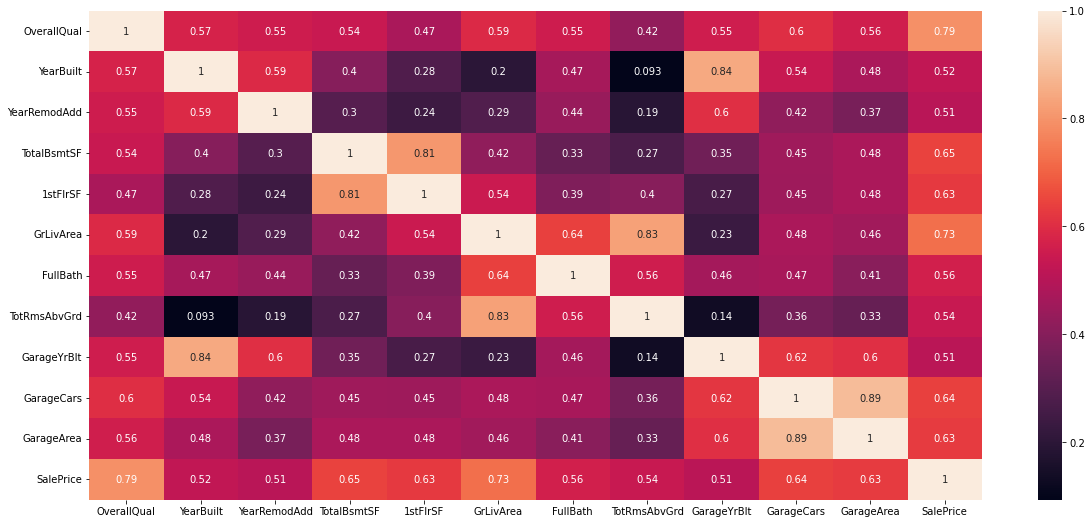

In [25]:
#correlation between column in train.csv
import matplotlib.pyplot as plt
correlation_significant = train_numerical.corr().index[abs(train_numerical.corr()["SalePrice"])>0.5]
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(train_numerical[correlation_significant].corr(), annot=True)
plt.show()

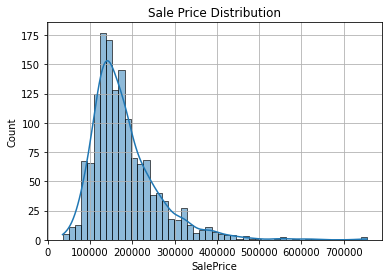

In [26]:
#check the distribution of SalePrice
sns.histplot(train_numerical['SalePrice'],kde=True)
plt.title('Sale Price Distribution')
plt.grid()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


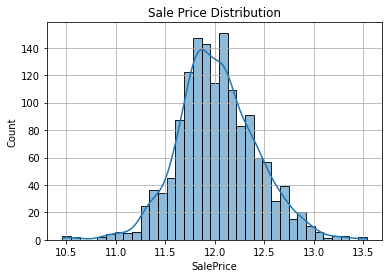

In [27]:
#log transformation for SalePrice
train_numerical['SalePrice']=np.log(train_numerical['SalePrice'])
#check the distribution of SalePrice
sns.histplot(train_numerical['SalePrice'],kde=True)
plt.title('Sale Price Distribution')
plt.grid()

In [28]:
#Correlation any features to SalePrice
corr_0 = train_numerical.corr()
corr_0.sort_values(["SalePrice"], ascending = False, inplace = True)
corr_0.SalePrice[abs(corr_0.SalePrice)>0.5]

SalePrice       1.000000
OverallQual     0.819626
GrLivArea       0.716807
GarageCars      0.680672
GarageArea      0.655609
TotalBsmtSF     0.642890
1stFlrSF        0.615479
FullBath        0.594956
YearBuilt       0.586956
GarageYrBlt     0.569062
YearRemodAdd    0.565933
TotRmsAbvGrd    0.536760
Name: SalePrice, dtype: float64

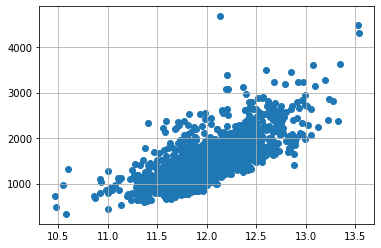

In [29]:
#Correlation between SalePrice and GrLivArea
import matplotlib.pyplot as plt
plt.scatter(train_numerical['SalePrice'],train_numerical['GrLivArea'])
plt.grid()
plt.show()

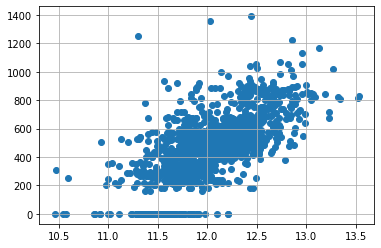

In [30]:
#Correlation between SalePrice and GarageArea
import matplotlib.pyplot as plt
plt.scatter(train_numerical['SalePrice'],train_numerical['GarageArea'])
plt.grid()
plt.show()

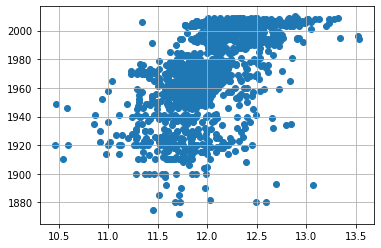

In [31]:
#Correlation between SalePrice and YearBuilt
import matplotlib.pyplot as plt
plt.scatter(train_numerical['SalePrice'],train_numerical['YearBuilt'])
plt.grid()
plt.show()

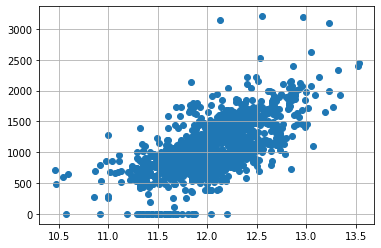

In [32]:
#Correlation between SalePrice and TotalBsmtSF
import matplotlib.pyplot as plt
plt.scatter(train_numerical['SalePrice'],train_numerical['TotalBsmtSF'])
plt.grid()
plt.show()

In [33]:
#Unique data in every columns of categorical features (train)
unique_data = [len(train_categorical[col].unique()) for col in train_categorical.columns]
unique_train_cat = list(zip(train_categorical,unique_data))
unique_train_cat_tab= pd.DataFrame(unique_train_cat, columns=['Features','Number of distinct values'])
unique_train_cat_tab.sort_values('Number of distinct values',ascending=False)
unique_train_cat_tab

,Features,Number of distinct values
0,MSZoning,5
1,Street,2
2,Alley,3
3,LotShape,4
4,LandContour,4
5,Utilities,2
6,LotConfig,5
7,LandSlope,3
8,Neighborhood,25
9,Condition1,9


In [34]:
#Label Encoding for categorical features (train)
from sklearn.preprocessing import LabelEncoder
for i in train_categorical.columns:
    le = LabelEncoder() 
    le.fit(list(train_categorical[i].values)) 
    train_categorical[i] = le.transform(list(train_categorical[i].values))
train_categorical

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,1,3,3,0,4,0,8,2,...,1,2,5,5,2,3,4,1,8,4
1456,3,1,1,3,3,0,4,0,14,2,...,1,3,5,5,2,3,2,1,8,4
1457,3,1,1,3,3,0,4,0,6,2,...,1,2,5,5,2,3,0,3,8,4
1458,3,1,1,3,3,0,4,0,12,2,...,1,3,5,5,2,3,4,1,8,4


In [35]:
#Label Encoding for categorical features (train)
from sklearn.preprocessing import LabelEncoder
for i in test_categorical.columns:
    le = LabelEncoder() 
    le.fit(list(test_categorical[i].values)) 
    test_categorical[i] = le.transform(list(test_categorical[i].values))
test_categorical

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,12,1,...,1,3,4,5,2,2,2,1,9,4
1,4,1,1,0,3,0,0,0,12,2,...,1,3,4,5,2,2,4,0,9,4
2,4,1,1,0,3,0,4,0,8,2,...,1,0,4,5,2,2,2,1,9,4
3,4,1,1,0,3,0,4,0,8,2,...,1,0,4,5,2,2,4,1,9,4
4,4,1,1,0,1,0,4,0,22,2,...,1,2,4,5,2,2,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5,1,1,3,3,0,4,0,10,2,...,6,1,2,3,2,2,4,1,9,4
1455,5,1,1,3,3,0,4,0,10,2,...,4,3,4,5,2,2,4,1,9,0
1456,4,1,1,3,3,0,4,0,11,2,...,5,3,4,5,2,2,4,1,9,0
1457,4,1,1,3,3,0,4,0,11,2,...,6,1,2,3,2,2,2,3,9,4


In [36]:
#combine categorical and numerical features into one datafarame (test)
test_fix = test_numerical.join(test_categorical)
test_fix = test_fix.dropna()
test_fix.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
                ..
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [37]:
#combine categorical and numerical features into one datafarame (train)
train_fix = train_numerical.join(train_categorical)
train_fix = train_fix.dropna()
train_fix.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
                ..
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [38]:
#Checking train_fix
train_fix.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0000,8450,7,5,2003,2003,196.0,706,0,...,1,2,5,5,2,3,4,1,8,4
1,20,80.0000,9600,6,8,1976,1976,0.0,978,0,...,1,2,5,5,2,3,4,1,8,4
2,60,68.0000,11250,7,5,2001,2002,162.0,486,0,...,1,2,5,5,2,3,4,1,8,4
3,70,60.0000,9550,7,5,1915,1970,0.0,216,0,...,5,3,5,5,2,3,4,1,8,0
4,60,84.0000,14260,8,5,2000,2000,350.0,655,0,...,1,2,5,5,2,3,4,1,8,4
5,50,85.0000,14115,5,5,1993,1995,0.0,732,0,...,1,3,5,5,2,3,2,3,8,4
6,20,75.0000,10084,8,5,2004,2005,186.0,1369,0,...,1,2,5,5,2,3,4,1,8,4
7,60,69.8475,10382,7,6,1973,1973,240.0,859,32,...,1,2,5,5,2,3,4,3,8,4
8,50,51.0000,6120,7,5,1931,1950,0.0,0,0,...,5,3,1,5,2,3,4,1,8,0
9,190,50.0000,7420,5,6,1939,1950,0.0,851,0,...,1,2,2,5,2,3,4,1,8,4


In [39]:
#define train_X,train_y,test_X and test_y
train_X = train_fix.drop('SalePrice',axis=1)
train_y = train_fix['SalePrice'].values

**Model Building**

**Predicting Value**

In [40]:
train_fix.shape,test_fix.shape

((1459, 80), (1459, 79))

In [41]:
#Import necessary tools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error

In [42]:
#Linear Regression
reg = LinearRegression()
reg.fit(train_X,train_y)
linear_pred = reg.predict(test_fix)
#Score
cv = KFold()
r2_val_score_lin = cross_val_score(reg,train_X,train_y)
lin_score= [r2_val_score_lin.mean()]
lin_rmse = np.sqrt(mean_squared_error(train_y,linear_pred))
print(lin_rmse)
print(lin_score)
print(linear_pred)

0.5739806510924934
[0.8895826269552274]
[11.58408    11.88178927 11.9190046  ... 11.90287839 11.52677854
 12.22517482]


In [43]:
#Regualtization I : Lasso
lasso = Lasso()
lasso.fit(train_X,train_y)
lasso_pred = lasso.predict(test_fix)
#Score
r2_val_score_lasso = cross_val_score(lasso,train_X,train_y)
lasso_score= [r2_val_score_lasso.mean()]
lasso_rmse = np.sqrt(mean_squared_error(train_y,lasso_pred))
print(lasso_rmse)
print(lasso_score)
print(lasso_pred)

0.5267381577622626
[0.8002283826133292]
[11.83299494 11.96349573 12.17485317 ... 12.10923744 11.67557089
 12.35571406]


In [44]:
#Regualtization II : Ridge
ridge = Ridge()
ridge.fit(train_X,train_y)
ridge_pred = ridge.predict(test_fix)
#Score
r2_val_score_ridge = cross_val_score(ridge,train_X,train_y)
ridge_score= [r2_val_score_ridge.mean()]
ridge_rmse = np.sqrt(mean_squared_error(train_y,ridge_pred))
print(ridge_rmse)
print(ridge_score)
print(ridge_pred)

0.5687662711241864
[0.8894885868112598]
[11.60442222 11.90221703 11.94116724 ... 11.92248761 11.54679056
 12.24649494]


In [45]:
#ElasticNet regressor
elastic_net = ElasticNet()
elastic_net.fit(train_X,train_y)
elasticnet_pred = elastic_net.predict(test_fix)
#Score
r2_val_score_elastic = cross_val_score(elastic_net,train_X,train_y)
elastic_score= [r2_val_score_elastic.mean()]
elasticnet_rmse = np.sqrt(mean_squared_error(train_y,elasticnet_pred))
print(elasticnet_rmse)
print(elastic_score)
print(elasticnet_pred)

0.5318432030823431
[0.8174193915991456]
[11.82413425 11.90313757 12.19851642 ... 12.12115956 11.70626456
 12.36251656]


In [46]:
#RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(train_X,train_y)
RFR_pred = elastic_net.predict(test_fix)
#Score
r2_val_score_RFR = cross_val_score(RFR,train_X,train_y)
RFR_score= [r2_val_score_RFR.mean()]
RFR_rmse = np.sqrt(mean_squared_error(train_y,RFR_pred))
print(RFR_rmse)
print(RFR_score)
print(RFR_pred)

0.5318432030823431
[0.8745397566884247]
[11.82413425 11.90313757 12.19851642 ... 12.12115956 11.70626456
 12.36251656]


In [47]:
#KNNRegressor
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)
knn_pred = knn.predict(test_fix)
#Score
r2_val_score_knn = cross_val_score(knn,train_X,train_y)
knn_score= [r2_val_score_knn.mean()]
knn_rmse = np.sqrt(mean_squared_error(train_y,knn_pred))
print(knn_rmse)
print(knn_score)
print(knn_pred)

0.5117742526477025
[0.684384738353027]
[11.91469171 12.20779766 12.05468069 ... 12.10148252 11.72637431
 12.40687855]


In [48]:
#DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(train_X,train_y)
dtr_pred = dtr.predict(test_fix)
#Score
r2_val_score_dtr = cross_val_score(dtr,train_X,train_y)
dtr_score= [r2_val_score_dtr.mean()]
dtr_rmse = np.sqrt(mean_squared_error(train_y,dtr_pred))
print(dtr_rmse)
print(dtr_score)
print(dtr_pred)

0.5667810179220468
[0.7339166650400388]
[11.87756858 11.88448902 12.14153412 ... 11.9381932  11.60823564
 12.37158708]


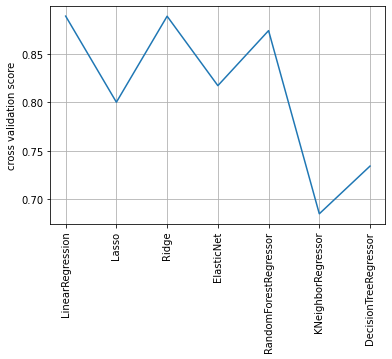

In [49]:
a = ['LinearRegression','Lasso','Ridge','ElasticNet','RandomForestRegressor','KNeighborRegressor','DecisionTreeRegressor']
b = [lin_score,lasso_score,ridge_score,elastic_score,RFR_score,knn_score,dtr_score]
plt.plot(a,b)
plt.ylabel('cross validation score')
plt.xticks(rotation=90)
plt.grid()
plt.show()

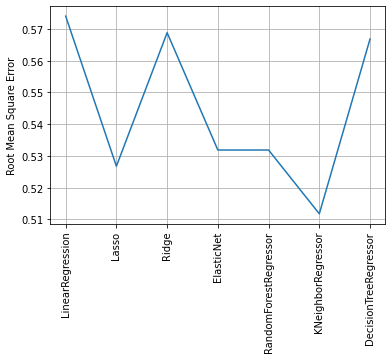

In [50]:
c = ['LinearRegression','Lasso','Ridge','ElasticNet','RandomForestRegressor','KNeighborRegressor','DecisionTreeRegressor']
d = [lin_rmse,lasso_rmse,ridge_rmse,elasticnet_rmse,RFR_rmse,knn_rmse,dtr_rmse]
plt.plot(c,d)
plt.ylabel('Root Mean Square Error')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [51]:
submission = pd.DataFrame({'Id':sample_sub.Id, 'SalePrice': np.exp(knn_pred)})
submission['Id']=submission['Id'].astype('int32')
submission

,Id,SalePrice
0,1461,149446.195146
1,1462,200345.300863
2,1463,171902.148954
3,1464,192350.928461
4,1465,142444.453913
...,...,...
1454,2915,91437.211281
1455,2916,94411.828654
1456,2917,180138.724280
1457,2918,123794.016726


In [52]:
submission.to_csv('my_submission.csv',index=False)